# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



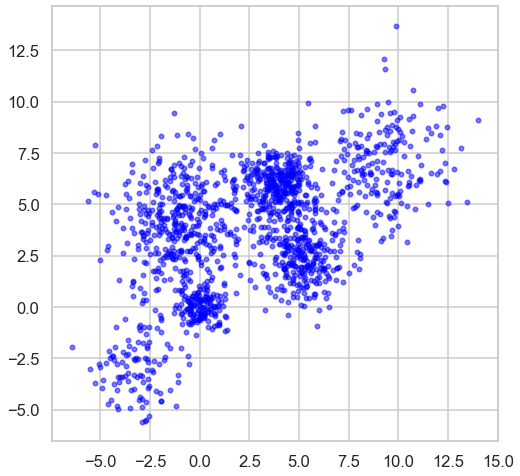

In [20]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [21]:
inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)


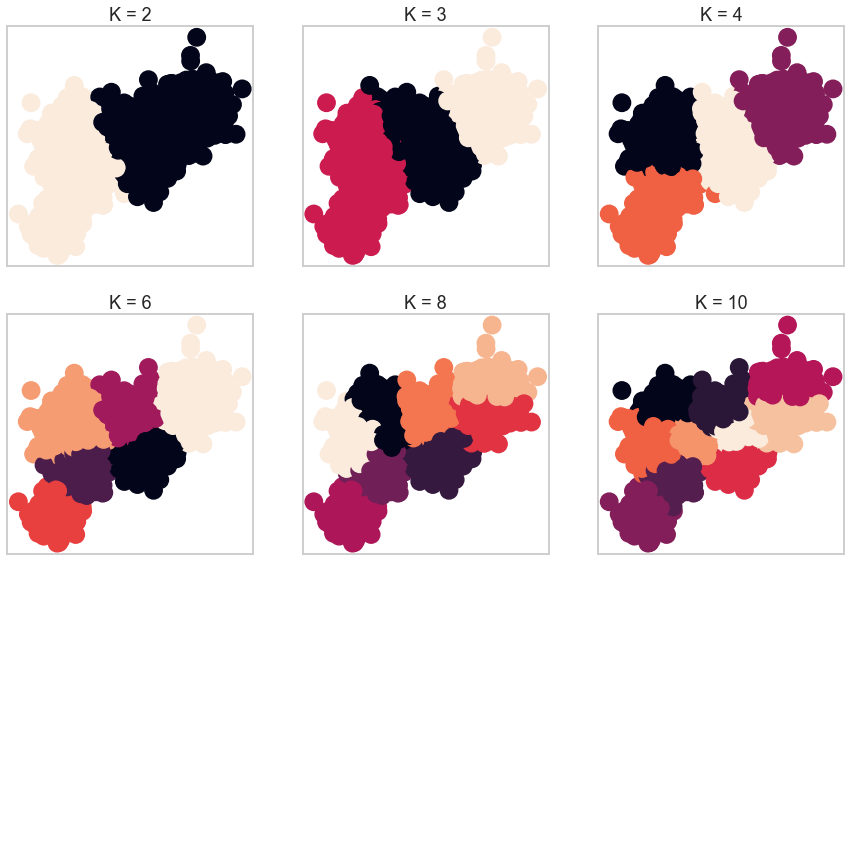

In [6]:
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

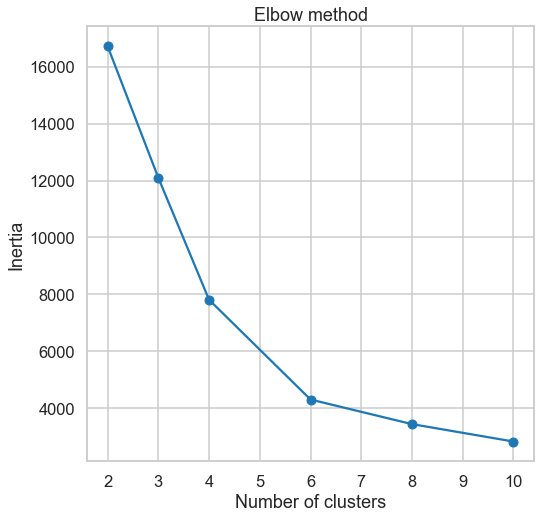

In [22]:
#The elbow method for best value of K 
plt.plot(K, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

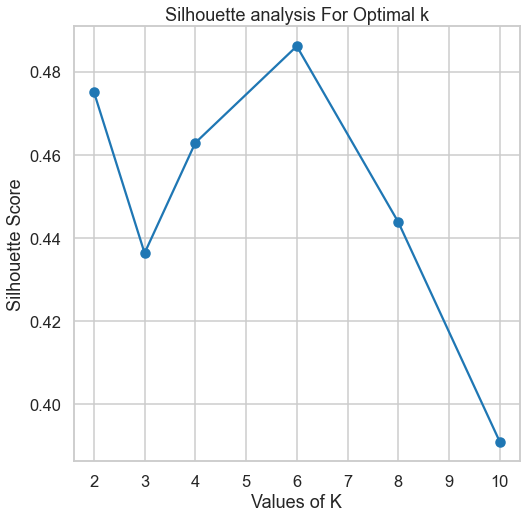

In [23]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(Multi_blob_Data)
    silhouette_avg.append(silhouette_score(Multi_blob_Data,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =6 as it has the highest score
bestsil_score = max(silhouette_avg)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

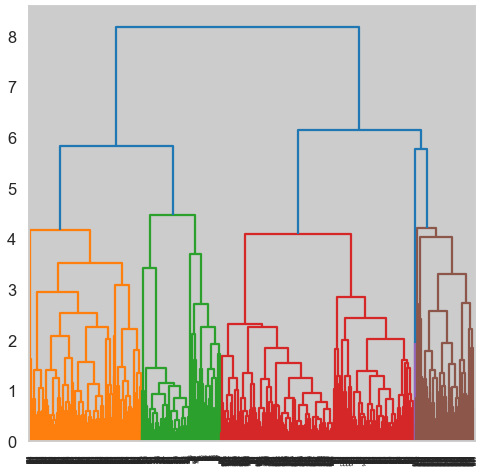

In [9]:
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

TypeError: 'dict' object is not callable

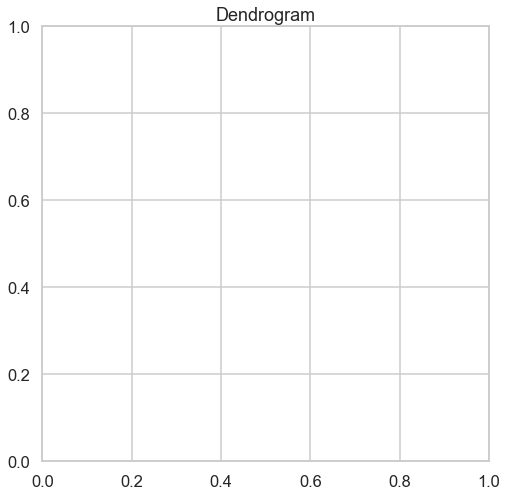

In [11]:
#euclidean average 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model = model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette1 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

In [ ]:
#euclidean single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette2 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

In [ ]:
#manhattan single 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='single')
model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_node='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette3 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

In [ ]:
#manhattan average 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='average')
model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_node='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette4 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

In [ ]:
#cosine average
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average')
model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_node='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette5 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

In [ ]:
#cosine single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='single')
model.fit(Multi_blob_Data)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_node='level', p=3)
plt.show()

In [ ]:
#Silhouette score
silhouette6 = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

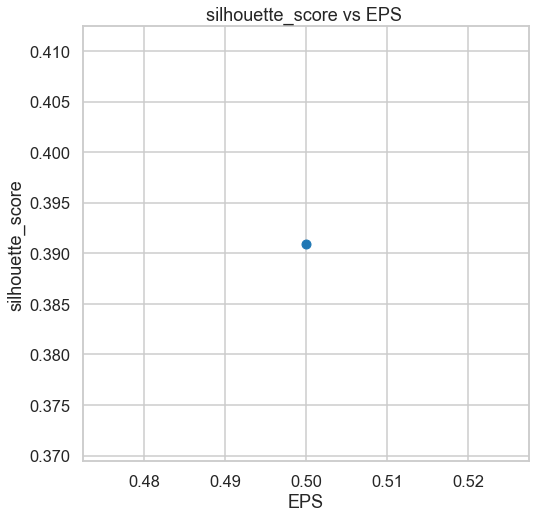

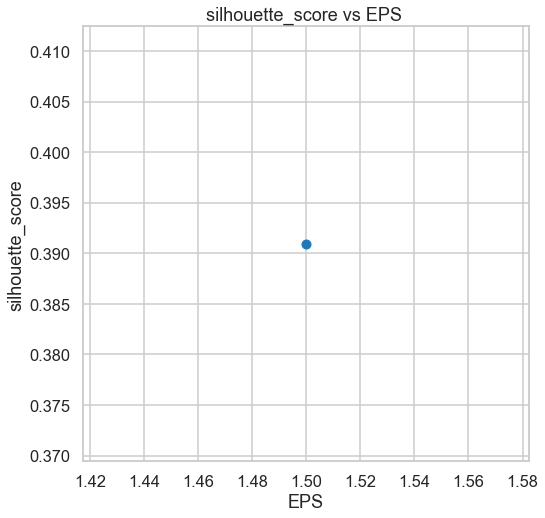

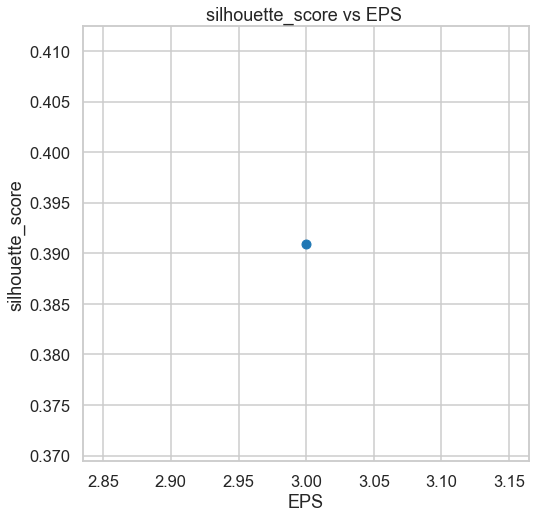

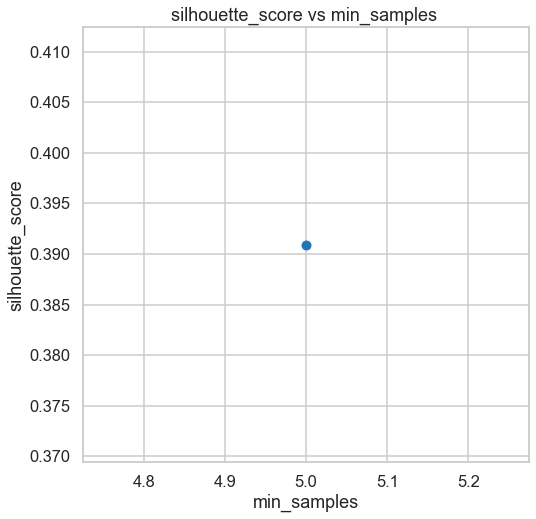

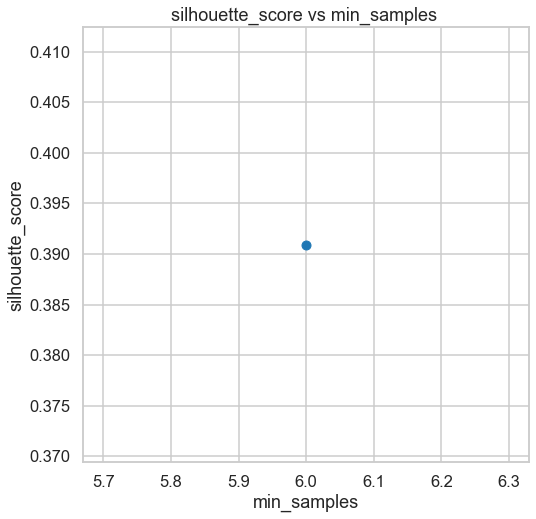

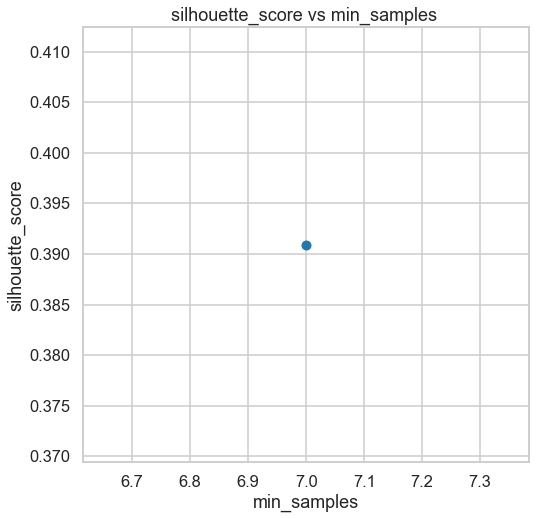

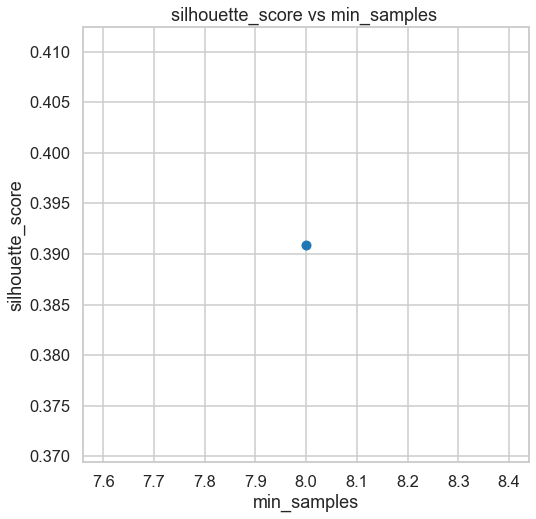

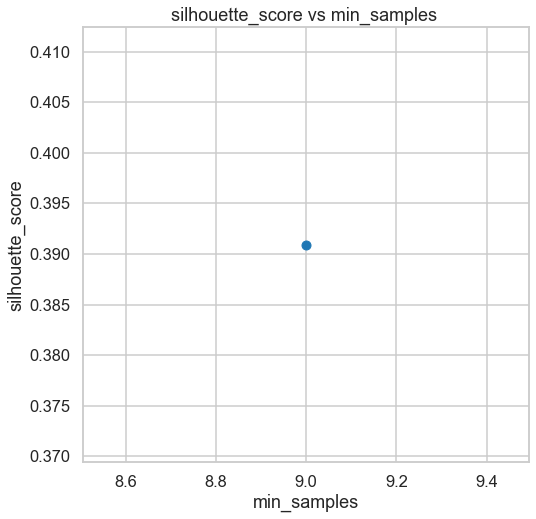

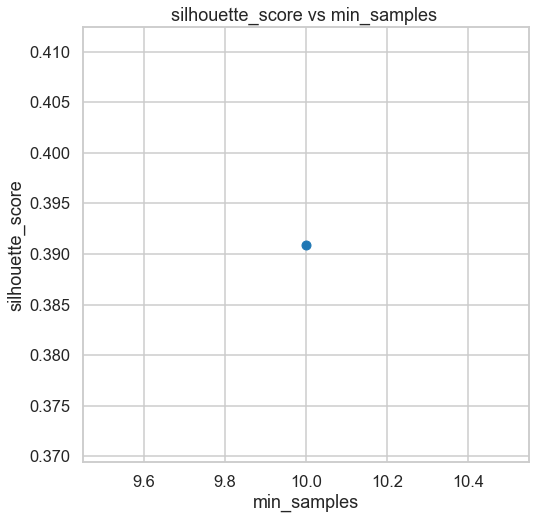

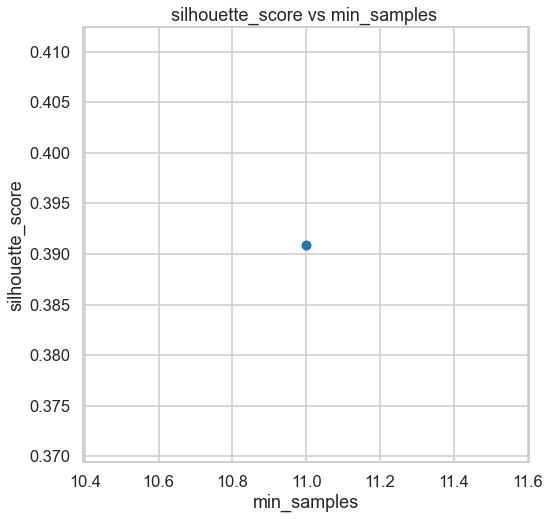

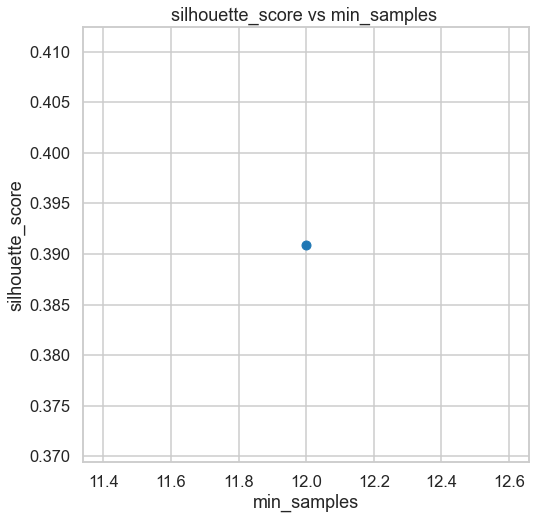

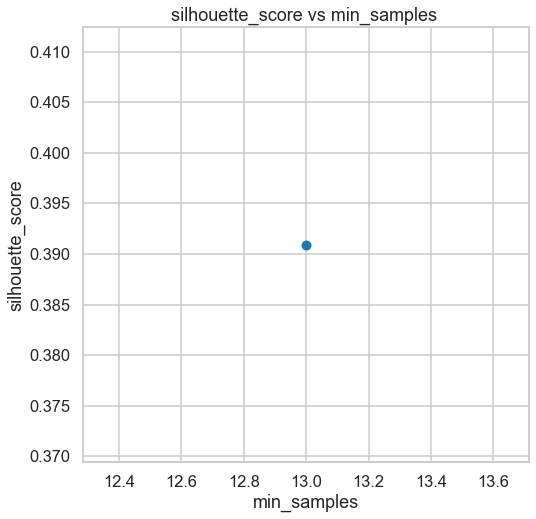

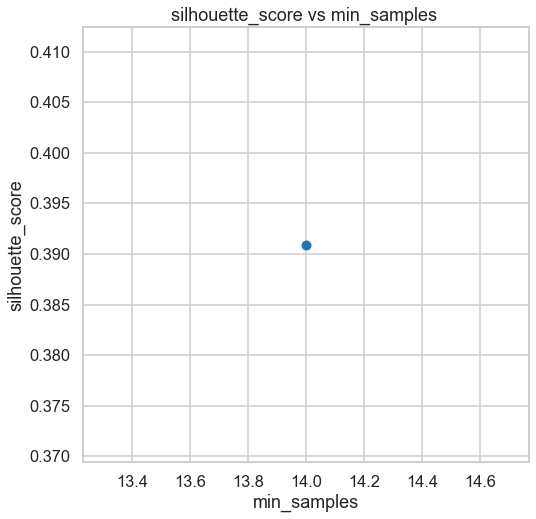

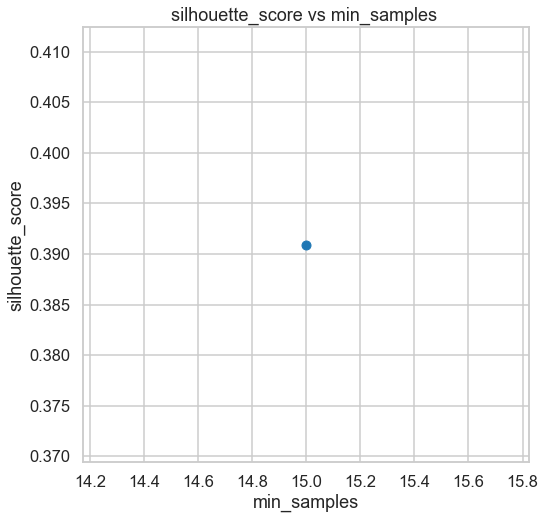

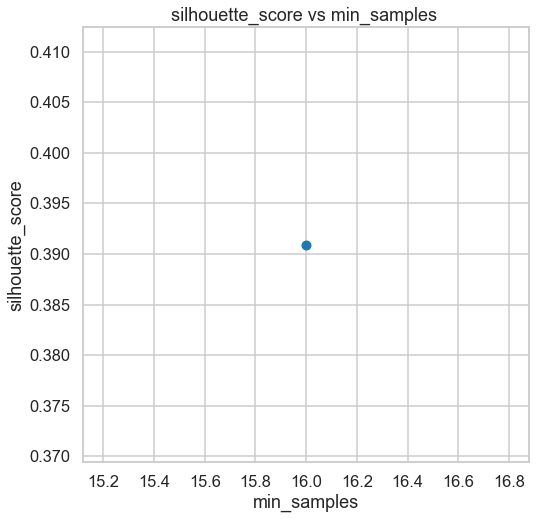

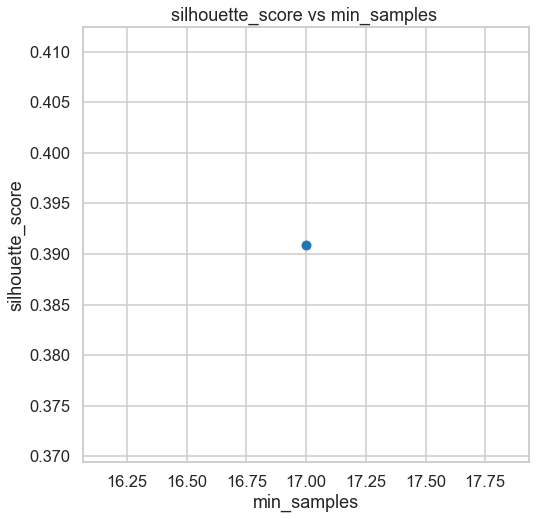

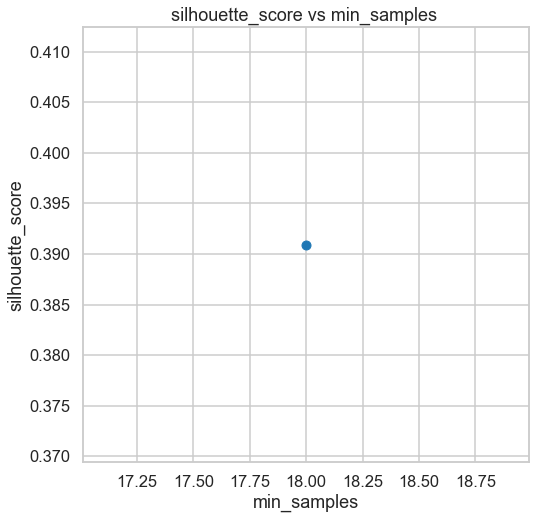

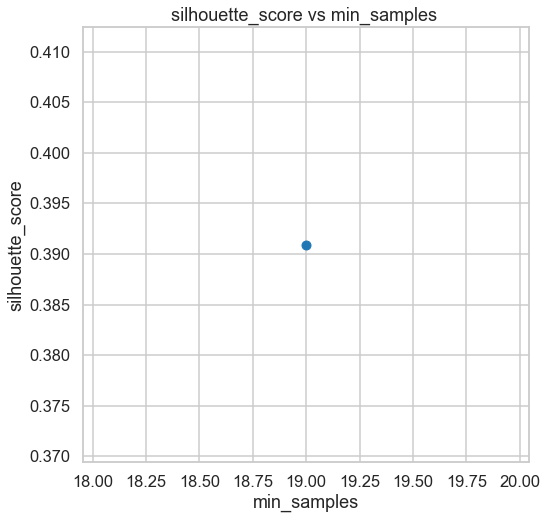

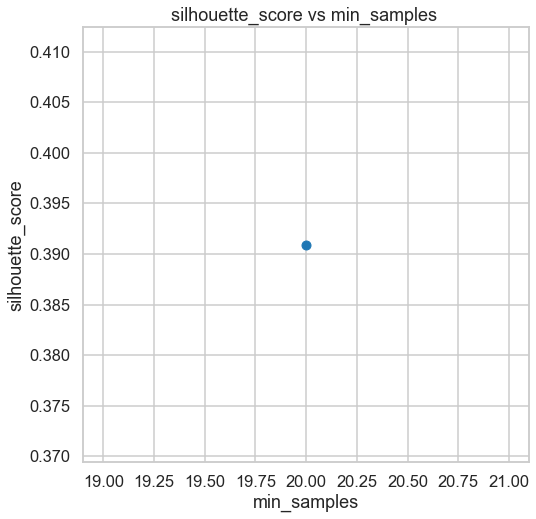

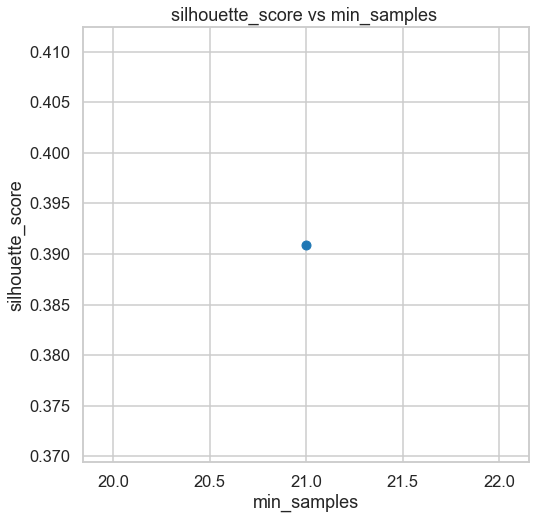

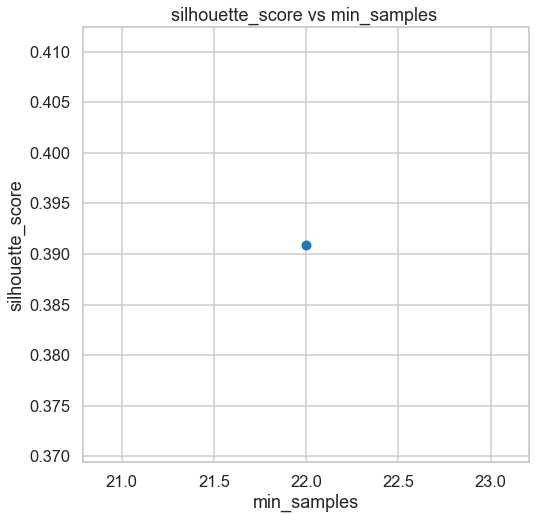

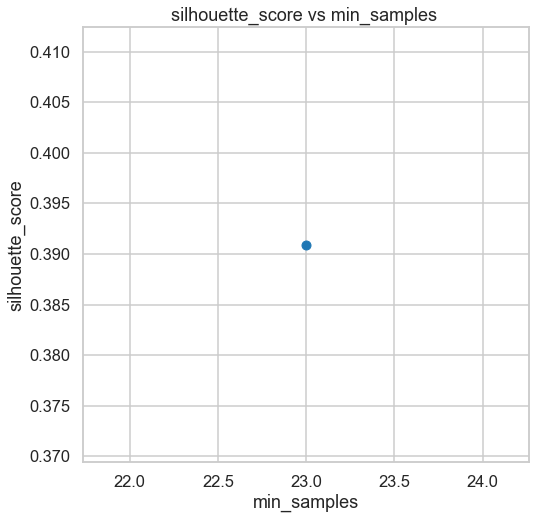

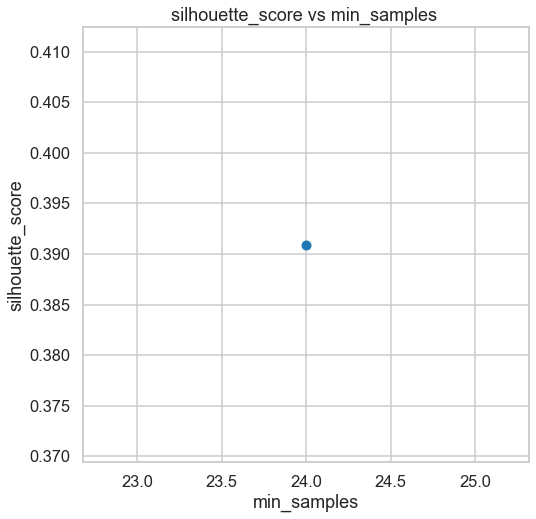

Estimated no. of clusters: 1
Estimated no. of noise points: 1450


In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

epsilon= 0.1
min_samples = 20
score = silhouette_score(Multi_blob_Data, kmeans.labels_)

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Multi_blob_Data)
labels = db.labels_

eps = [0.5, 1.5, 3]
for eps in eps:
    plt.plot(eps, score, marker='o')
    plt.title('silhouette_score vs EPS ')
    plt.xlabel('EPS')
    plt.ylabel('silhouette_score')
    plt.show()
for min_samples in range(5,25,1):
    plt.plot(min_samples, score, marker='o')
    plt.title('silhouette_score vs min_samples ')
    plt.xlabel('min_samples')
    plt.ylabel('silhouette_score')
    plt.show() 


no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [12]:
df=pd.read_csv('Customer data.csv')

In [13]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


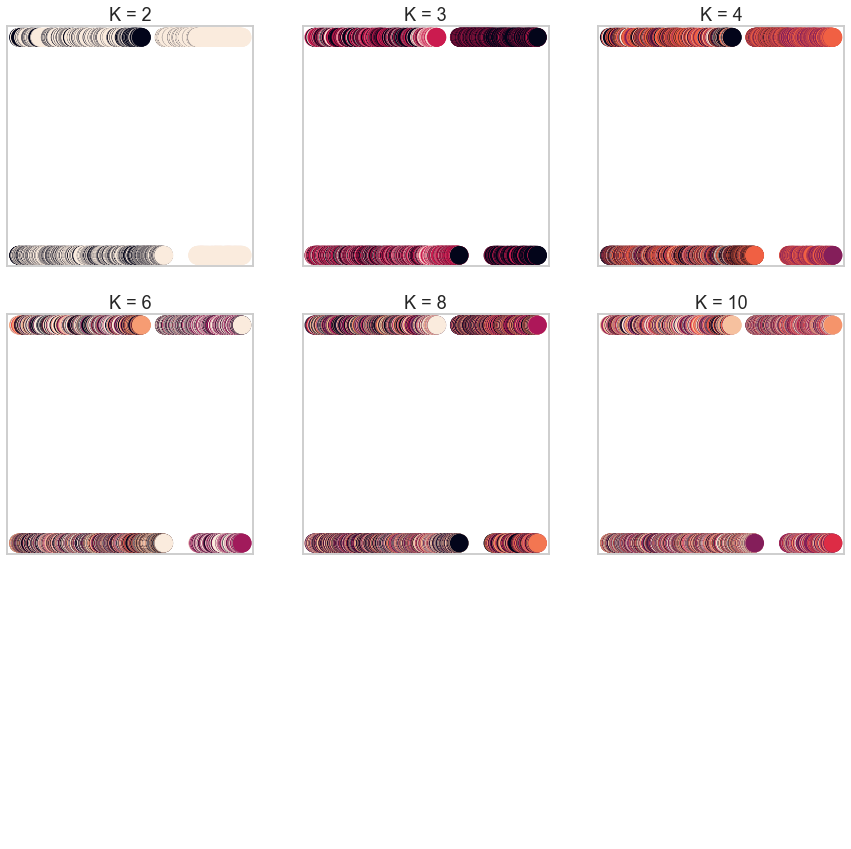

In [16]:
#KMEANS:


inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(df.values[:, 0], df.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

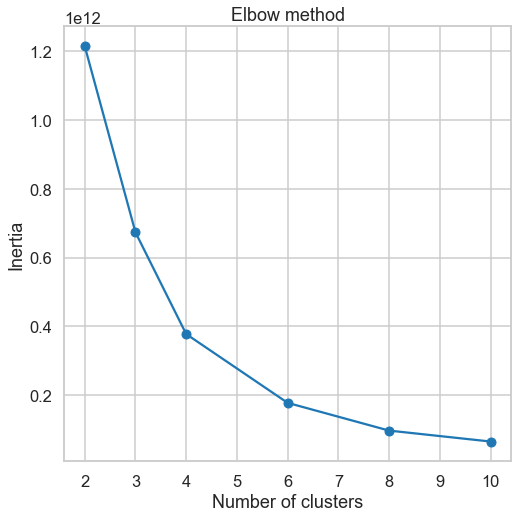

In [17]:
#The elbow method for best value of K 
plt.plot(K, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

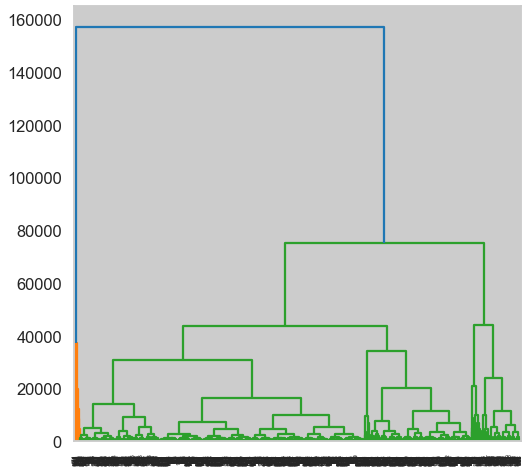

In [25]:
#hierarechal :

dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))

In [ ]:
#euclidean average 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='average')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette1 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#euclidean single 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette2 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#manhattan average 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='average')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette3 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#manhattan single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='single')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette4 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#cosine average 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='average')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette5 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#cosine single
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='cosine', linkage='single')
model = model.fit(df.values)
plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()
#Silhouette score
silhouette6 = silhouette_score(df.values,model.labels_,metric='euclidean')

In [ ]:
#DBScan :

epsilon= 0.1
min_samples = 20
score = silhouette_score(df.values, kmeans.labels_)

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df.values)
labels = db.labels_

eps = [0.5, 1.5, 3]
for eps in eps:
    plt.plot(eps, score, marker='o')
    plt.title('silhouette_score vs EPS ')
    plt.xlabel('EPS')
    plt.ylabel('silhouette_score')
    plt.show()
for min_samples in range(5,25,1):
    plt.plot(min_samples, score, marker='o')
    plt.title('silhouette_score vs min_samples ')
    plt.xlabel('min_samples')
    plt.ylabel('silhouette_score')
    plt.show() 


no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)